In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
from datetime import timedelta
import firebase_admin
from firebase_admin import db
from firebase_admin import credentials
import pytz


def to_datetime(dates, zone="US/Eastern", tz_aware=True):
    """
    Standardizes the various types of string datetime formats
    """
    dt = []
    for i in dates:
        try:
            i_dt = datetime.strptime(i, '%Y%m%d_%H:%M:%S')
        except:
            print(i)
        if tz_aware:
            # tz = pytz.timezone('US/Eastern')
            tz = pytz.timezone('UTC')
            i_dt = tz.localize(i_dt)
            dt.append(i_dt.astimezone(pytz.timezone(zone)))
        else:
            dt.append(i_dt)
    return np.array(dt)  

### ONLY RUN ONCE! ###
#download data from firebase
try:
    firebase_admin.delete_app(app)
except:
    print('making new app')
cred = credentials.Certificate("../fb_key.json")
app = firebase_admin.initialize_app(cred, {'databaseURL': 'https://haucs-monitoring-default-rtdb.firebaseio.com'})

/Users/wfairman/opt/anaconda3/envs/lab2/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


making new app


In [2]:
data = db.reference('LH_Farm/').order_by_key().start_at("p").get()

In [5]:
init_do = []
for i in data:
    if i[5:].isnumeric():
        for j in data[i]:
            entry = data[i][j]
            if entry['type'] == "truck":
                init_do.append(entry['init_do'])

init_do = np.array(init_do)

In [4]:
np.arange(19) * 10

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180])

In [31]:
init_do = init_do.astype('int')
init_do.min

0

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240]
[ 4 16 16 ... 15 15 15]
[  0  12   0  47  54  76 110 317 444 393 478 646 636 575 435 365 284 260
 118 114   0   0   0   0   4  92]
113.87124542124542 38.791677304793815


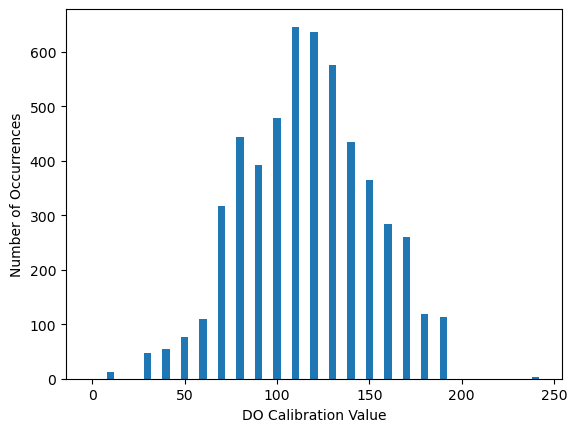

In [36]:
bins = np.arange(25) * 10
print(bins)
indices = np.digitize(init_do, bins)
print(indices)
x = np.bincount(indices)
print(x)
plt.bar(bins, x[:-1], width=4)
plt.xlabel("DO Calibration Value")
plt.ylabel("Number of Occurrences")
plt.savefig('calibration_occurences.png')

print(init_do.mean(), init_do.std())

In [6]:
dt_list = list(data.keys())
dt = to_datetime(dt_list)

init_do = data[dt_list[0]]['init_do']
init_p = data[dt_list[0]]['init_pressure']

t = np.array([np.mean(data[i]['temp']) for i in data])
do = np.array([np.mean(data[i]['do'])/init_do for i in data]) * 100
p = np.array([np.mean(data[i]['pressure']) - init_p for i in data]) * 0.010227
batt_v = np.array([data[i]['batt_v'] for i in data])

print(dt[-1], data[dt_list[-1]]['batt_v'])

pond_1


UnboundLocalError: cannot access local variable 'i_dt' where it is not associated with a value